# Kothai Niveda M
# Unsupervised Learning: Trade&Ahead

**Marks: 60**

## Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


## Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [3]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Loading dataset
df=pd.read_csv("stock_data.csv")

## Data Overview

- Observations
- Sanity checks

**View the first 5 rows of the dataset.**

In [5]:
# Viewing the first 5 rows of the dataset
df.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


**View the last 5 rows of the dataset.**

In [6]:
# Viewing the last 5 rows of the dataset
df.tail()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
335,YHOO,Yahoo Inc.,Information Technology,Internet Software & Services,33.259998,14.887727,1.845149,15,459,-1032187000,-4359082000,-4.64,939457327.6,28.976191,6.261775
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,435353535.4,17.682214,-3.838260
337,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,102.589996,9.347683,1.404206,1,100,376000000,147000000,0.78,188461538.5,131.525636,-23.884449
338,ZION,Zions Bancorp,Financials,Regional Banks,27.299999,-1.158588,1.468176,4,99,-43623000,309471000,1.20,257892500.0,22.749999,-0.063096
339,ZTS,Zoetis,Health Care,Pharmaceuticals,47.919998,16.678836,1.610285,32,65,272000000,339000000,0.68,498529411.8,70.470585,1.723068


**Understanding the shape of the dataset**

In [7]:
# Viewing the shape of the dataset
df.shape

(340, 15)

#### Observations:
* The dataset has 340 rows and 15 columns 

**Check data types and number of non-null values for each column.**

In [8]:
# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

#### Observations:
- We can see that there are total of 15 columns and 340 rows in the dataset.
- Only the Ticker Symbol, Security, GICS Sector and GICS Sub Industry columns are of object data type. All other columns are of either float64 or int64 data type. 
- The column security is in fact incorrectly named. It should be company. We will change that later. 
- The number of non-null values of each column is equal to the number of total rows in the dataset i.e. no null value. We can further confirm this using `isna()` method.

**Changing column name from Security to Company**

In [9]:
# Changing column name from Security to Company
df_new = df.rename(columns={'Security': 'Company'})
print(df_new)

    Ticker Symbol                  Company             GICS Sector  \
0             AAL  American Airlines Group             Industrials   
1            ABBV                   AbbVie             Health Care   
2             ABT      Abbott Laboratories             Health Care   
3            ADBE        Adobe Systems Inc  Information Technology   
4             ADI     Analog Devices, Inc.  Information Technology   
..            ...                      ...                     ...   
335          YHOO               Yahoo Inc.  Information Technology   
336           YUM          Yum! Brands Inc  Consumer Discretionary   
337           ZBH   Zimmer Biomet Holdings             Health Care   
338          ZION            Zions Bancorp              Financials   
339           ZTS                   Zoetis             Health Care   

                GICS Sub Industry  Current Price  Price Change  Volatility  \
0                        Airlines      42.349998      9.999995    1.687151   
1  

**Check missing values for each column.**

In [10]:
# Checking missing values for each column.
df_new.isna().sum()

Ticker Symbol                   0
Company                         0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

#### Observations:
- There are no missing values in the data.

**Summary of the dataset**

In [11]:
# This code will show us a summary of both numerical and non-numerical variables.
# .T gives us a transpose of the matrix for better visualization.

df_new.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AEP,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Company,340,340,Regeneron,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


#### Observations:
* `Ticker Symbol`: This is just an identifier for each company.
* `Company`: This is just the name of each company. 
* `GICS Sector`: There are 11 unique sectors and Industrials is the most common sector. 
* `GICS Sub Industry`: There are 104 unique sub industries and Oil & Gas Exploration & Production is the most common sub industry. 
* `Current Price`: The current stock price ranges from 4.50 dollars to about 1274.95 dollars with a mean of around 80.86 dollars. There is a huge difference in the 75th percentile and maximum value and hence there could be some skewness. 
* `Price Change`: The percentage change in the stock price in 13 weeks ranges from about -47.13% to about 55.05% with a mean of around 4.08%
* `Volatility`: The standard deviation of the stock price over the past 13 weeks ranges from about 0.73 to about 4.58 with a mean of about 1.53 
* `ROE`: ROE ranges from 1 to 917 with a mean of about 39.60. There is a huge difference in the 75th percentile and maximum value and hence there could be some skewness. 
* `Cash Ratio`: The cash ratio ranges from 0 to 958 with a mean of about 70.02. Again there is a huge difference in the 75th percentile and maximum value and hence there could be some skewness. 
* `Net Cash Flow`: The net cash flow ranges widely from -11208000000 dollars to 20764000000 dollars with a mean of about 55537620.59 dollars.
* `Net Income`: The net income also ranges widely from -23528000000 dollars to 24442000000 dollars with a mean of about 1494384602.94  dollars
* `Earnings Per Share`: The earnings per share ranges from about -61.20 dollars to about 50.09 dollars with a mean of about 2.78 dollars. There is a huge difference in the 25th percentile and the min and the 75th percentile and maximum value and hence there could be some skewness. 
* `Estimated Shares Outstanding`: The estimated shares outstanding ranges from about 27672156.86 to 6159292035 with a mean of about 577028337.75
* `P/E Ratio`: The P/E Ratio ranges from about 2.94 to about 528.04 with a mean of about 32.61. There is a huge difference in the 75th percentile and maximum value and hence there could be some skewness. 
* `P/B Ratio`: The P/B Ratio ranges from about -76.12 to about 129.06 with a mean of about 1.72. There is quite a difference in the 25th percentile and the min and the 75th percentile and maximum value and hence there could be some skewness. 

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

In [12]:
# This function will give a boxplot and histogram combined along the same scale for any input numerical variable.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # We are going to have 2 rows for the subplot grid.
        sharex=True,  # this indicates x-axis will be shared among the subplots.
        gridspec_kw={"height_ratios": (0.25, 0.75)}, # the height ratio of the plots would be 1:3
        figsize=figsize,)
    
    # creating the 2 subplots
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")  # a boxplot will be plotted with 
    # a green triangle representing the mean value.
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2) # a histogram will be plotted with bins if specified in the input, 
    # else it will automatically plot it's own bins.
    
    # Adding mean and median lines for histogram
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Adding mean line.
    ax_hist2.axvline(data[feature].median(), color="red", linestyle="-")  # Adding median line.

In [13]:
# This function will give a labeled barplot for us to explore categorical variables.


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),)

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",)  # annotate the percentage

    plt.show()  # show the plot

### 1. Ticker Symbol

In [14]:
# check unique Ticker Symbols
df_new['Ticker Symbol'].value_counts().shape

(340,)

#### Observations:
* There are 340 unique Ticker Symbols. Ticker Symbol is just an identifier for the companies.

### 2. Company

In [15]:
# check unique Companies
df_new['Company'].value_counts().shape

(340,)

#### Observations:
* Again, there are 340 unique companies.

### 3. GICS Sector

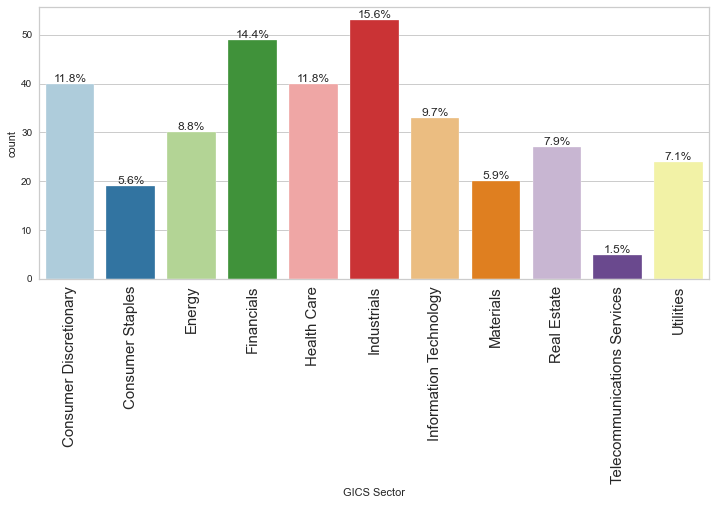

In [16]:
labeled_barplot(df_new, 'GICS Sector', perc=True)

#### Observations:
- Industrials (15.6%) is the most common economic sector, followed by Financials (14.4%) and Health Care and Consumer Discretionary (both 11.8%).
- Telecommunications Services (1.5%) is the least common economic sector.

### 4. GICS Sub Industry 

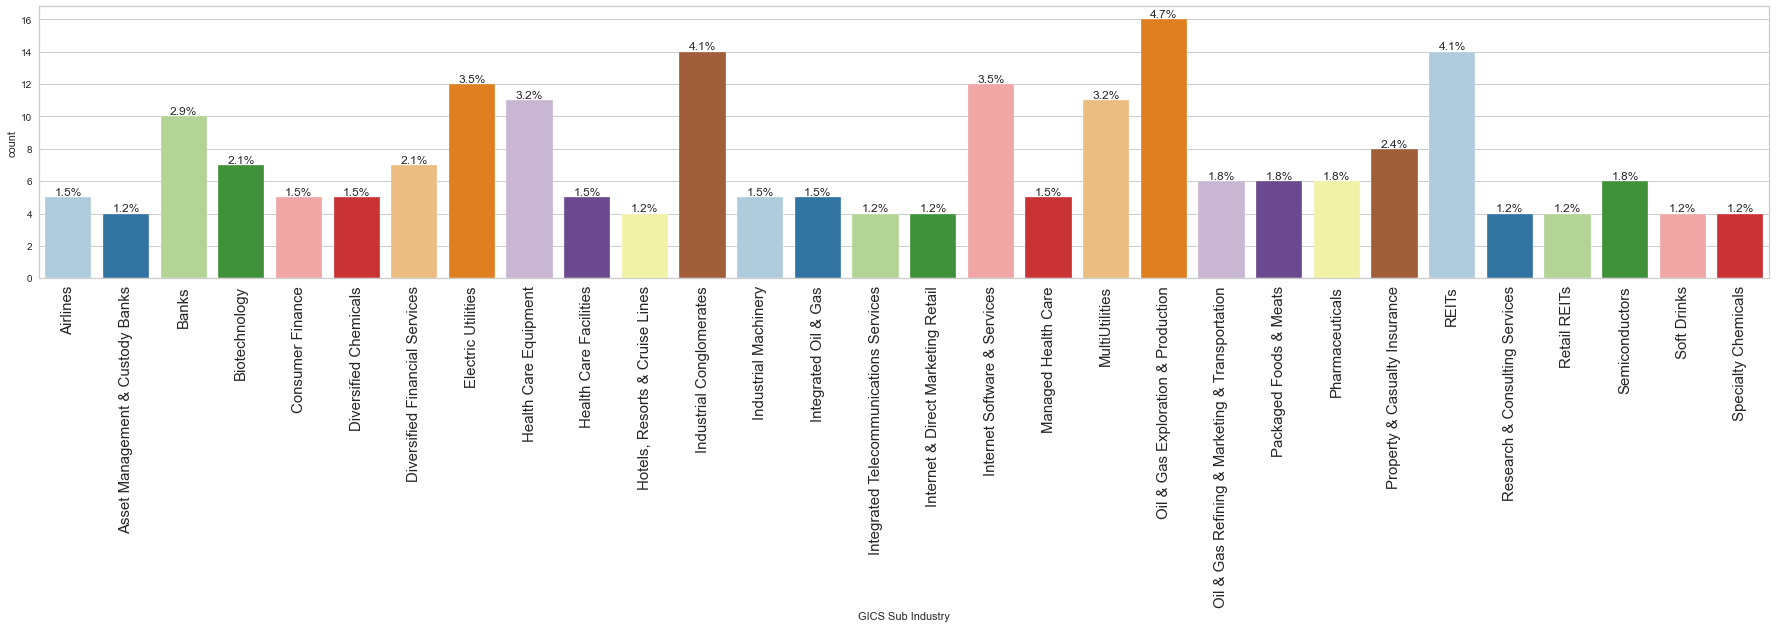

In [17]:
labeled_barplot(df_new, 'GICS Sub Industry', perc=True, n=30)

#### Observations:
- Out of 104 unique sub industries, we see the top 30 unique sub industries. 
- Oil and Gas Exploration and Transportation (4.7%) is the most common sub industry. This is followed by Industrial Conglormerates and REITS (4.1%). 

### 5. Current Price

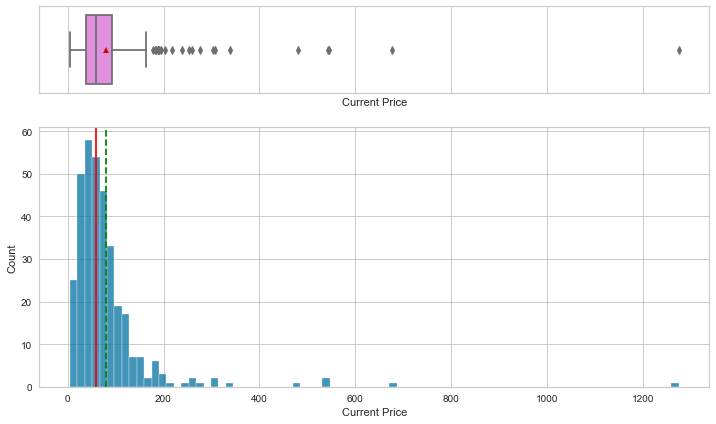

In [18]:
histogram_boxplot(df_new, 'Current Price')

#### Observations:
Q1. What does the distribution of stock prices look like?
- There is a wide range in the stock price with the minimum around 5 dollars and a maximum of about 1275 dollars. 
- The distribution of stock price is skewed to the right with some outliers.

### 6. Price Change

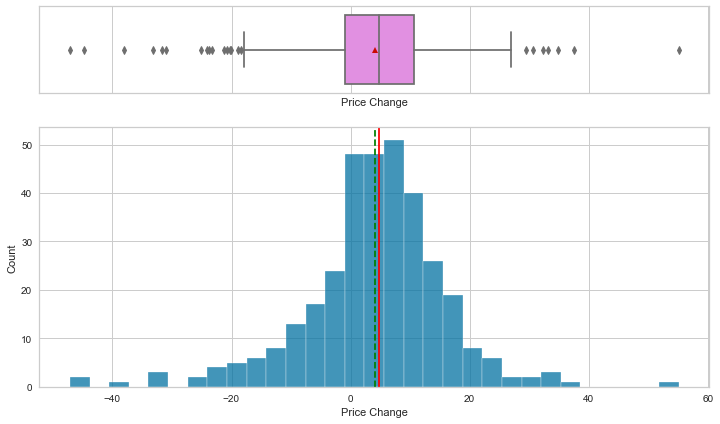

In [19]:
histogram_boxplot(df_new, 'Price Change')

#### Observations:
- The price change varies from about -50% to about 55%.
- The distribution of price change is close to a normal distribution.

### 7. Volatility

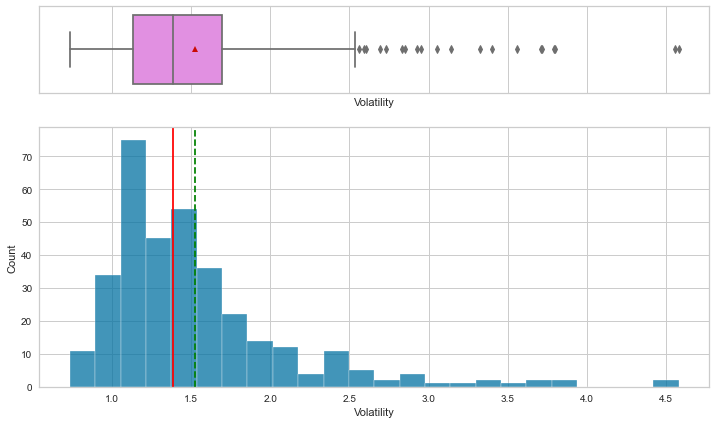

In [20]:
histogram_boxplot(df_new, 'Volatility')

#### Observations:
- The volatility ranges from a minimum of about 0.7 to a maximum of about 4.5
- The distribution is right skewed. 

### 8. ROE

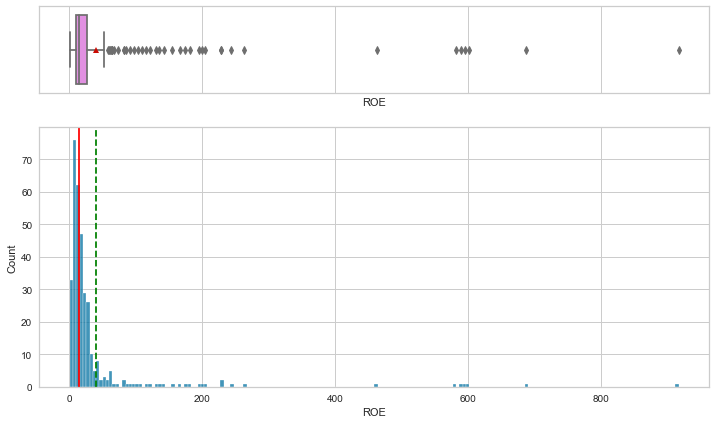

In [21]:
histogram_boxplot(df_new, 'ROE')

#### Observations:
- There is a wide range in the ROE with a minimum of about 1 to a maximum of about 900.
- The distribution is heavily right skewed with some outliers. 

### 9. Cash Ratio

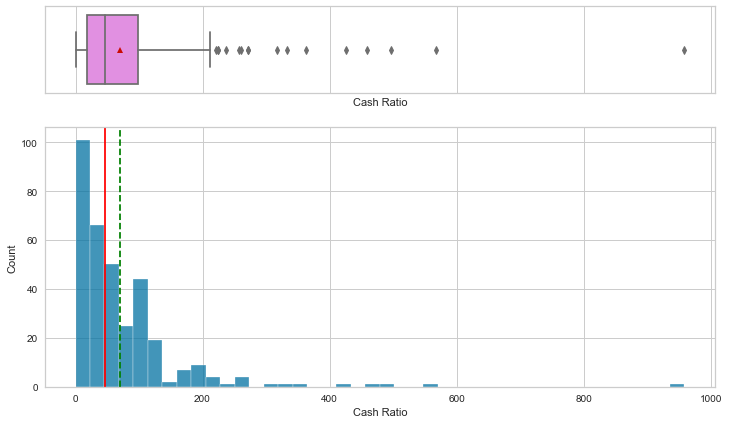

In [22]:
histogram_boxplot(df_new, 'Cash Ratio')

#### Observations:
- The cash ratio ranges from a minimum of 0 to about 950.
- The distribution is right skewed with some outliers.

### 10. Net Cash Flow

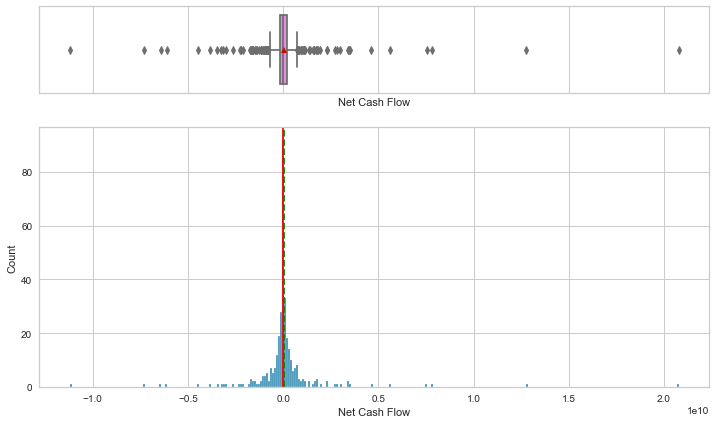

In [23]:
histogram_boxplot(df_new, 'Net Cash Flow')

#### Observations:
- The net cash flow has a wide range.
- The distribution is close to a normal distribution with some outliers.

### 11. Net Income

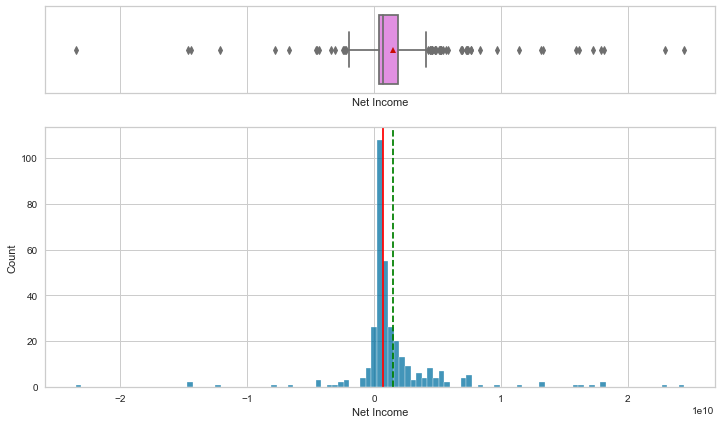

In [24]:
histogram_boxplot(df_new, 'Net Income')

#### Observations:
- The net income also ranges widely from about -25000000000 dollars to about 25000000000 dollars.
- The distribution is close to a normal distribution.

### 12. Earnings Per Share

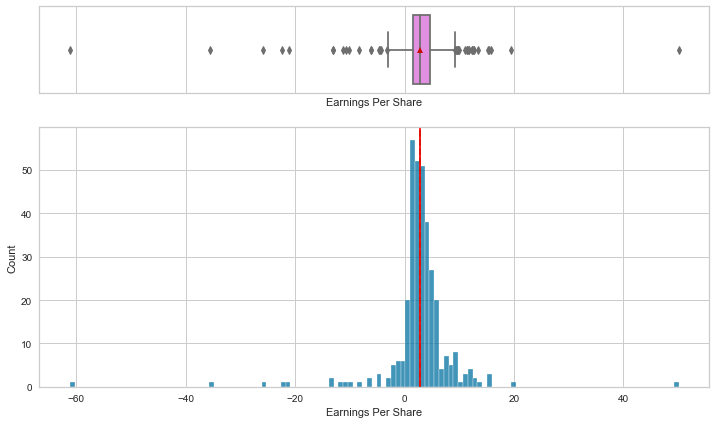

In [25]:
histogram_boxplot(df_new, 'Earnings Per Share')

#### Observations:
- The earnings per share ranges from a minimum of about -60 to a maximum of about 50.
- The distribution is close to a normal distribution with some outliers.

### 13. Estimated Shares Outstanding

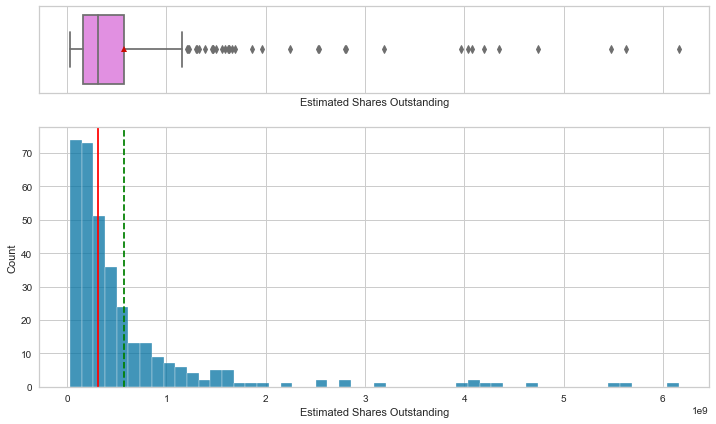

In [26]:
histogram_boxplot(df_new, 'Estimated Shares Outstanding')

#### Observations:
- The estimated shares outstanding ranges from a minimum of about 27000000 to 6000000000. 
- The distribution is skewed to the right.

### 14. P/E Ratio

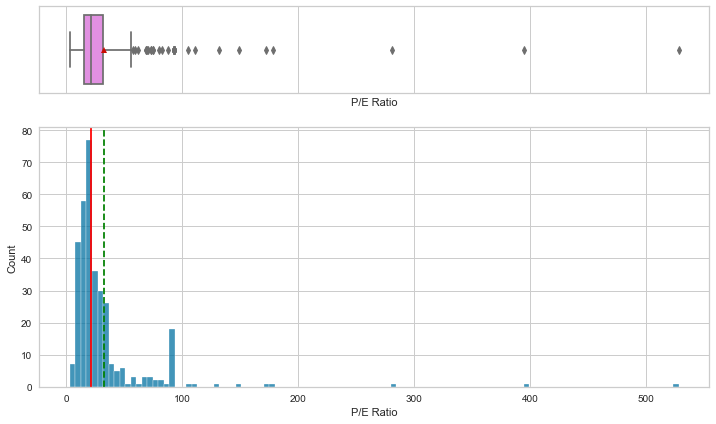

In [27]:
histogram_boxplot(df_new, 'P/E Ratio')

#### Observations:
- The P/E ratio ranges from a minimum of about 3 to 530.
- The distribution is right skewed with some outliers. 

### 15. P/B Ratio

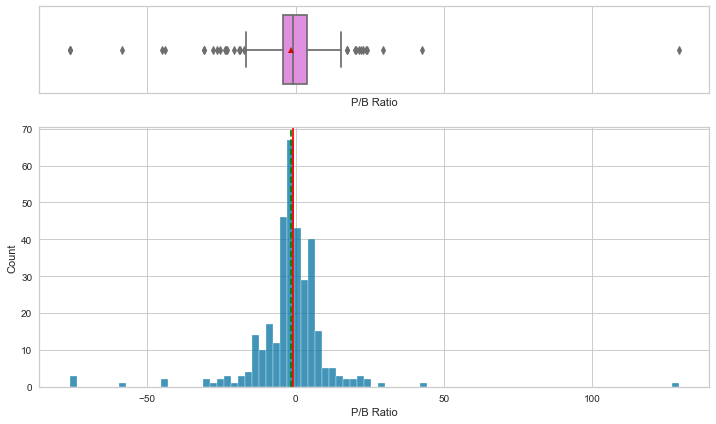

In [28]:
histogram_boxplot(df_new, 'P/B Ratio')

#### Observations:
- The P/B ratio ranges from a minimum of about -75 to about 130.
- The distribution is close to a normal distribution with some outliers.

## Bivariate Analysis

### 1. Heatmap

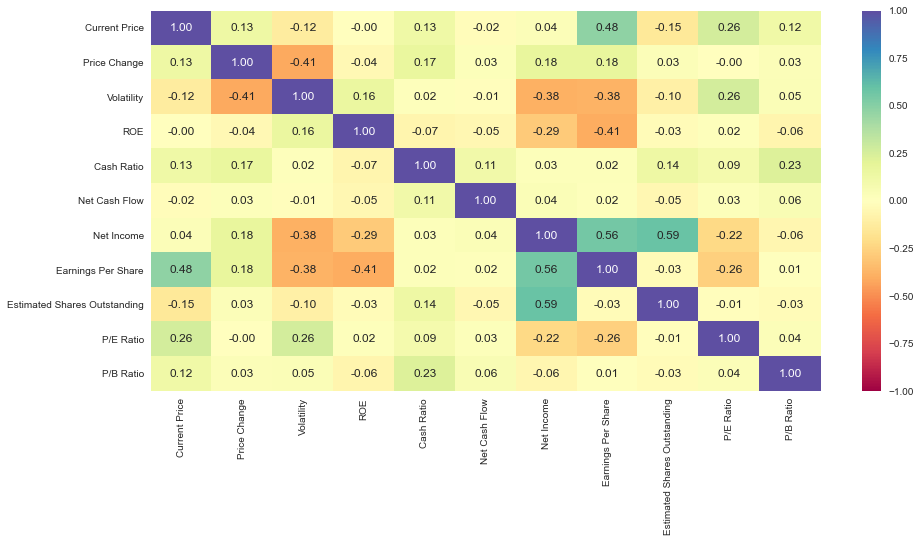

In [29]:
# plotting a heatmap of all numerical variables
plt.figure(figsize=(15, 7))
sns.heatmap(df_new.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### 2. Pairplot

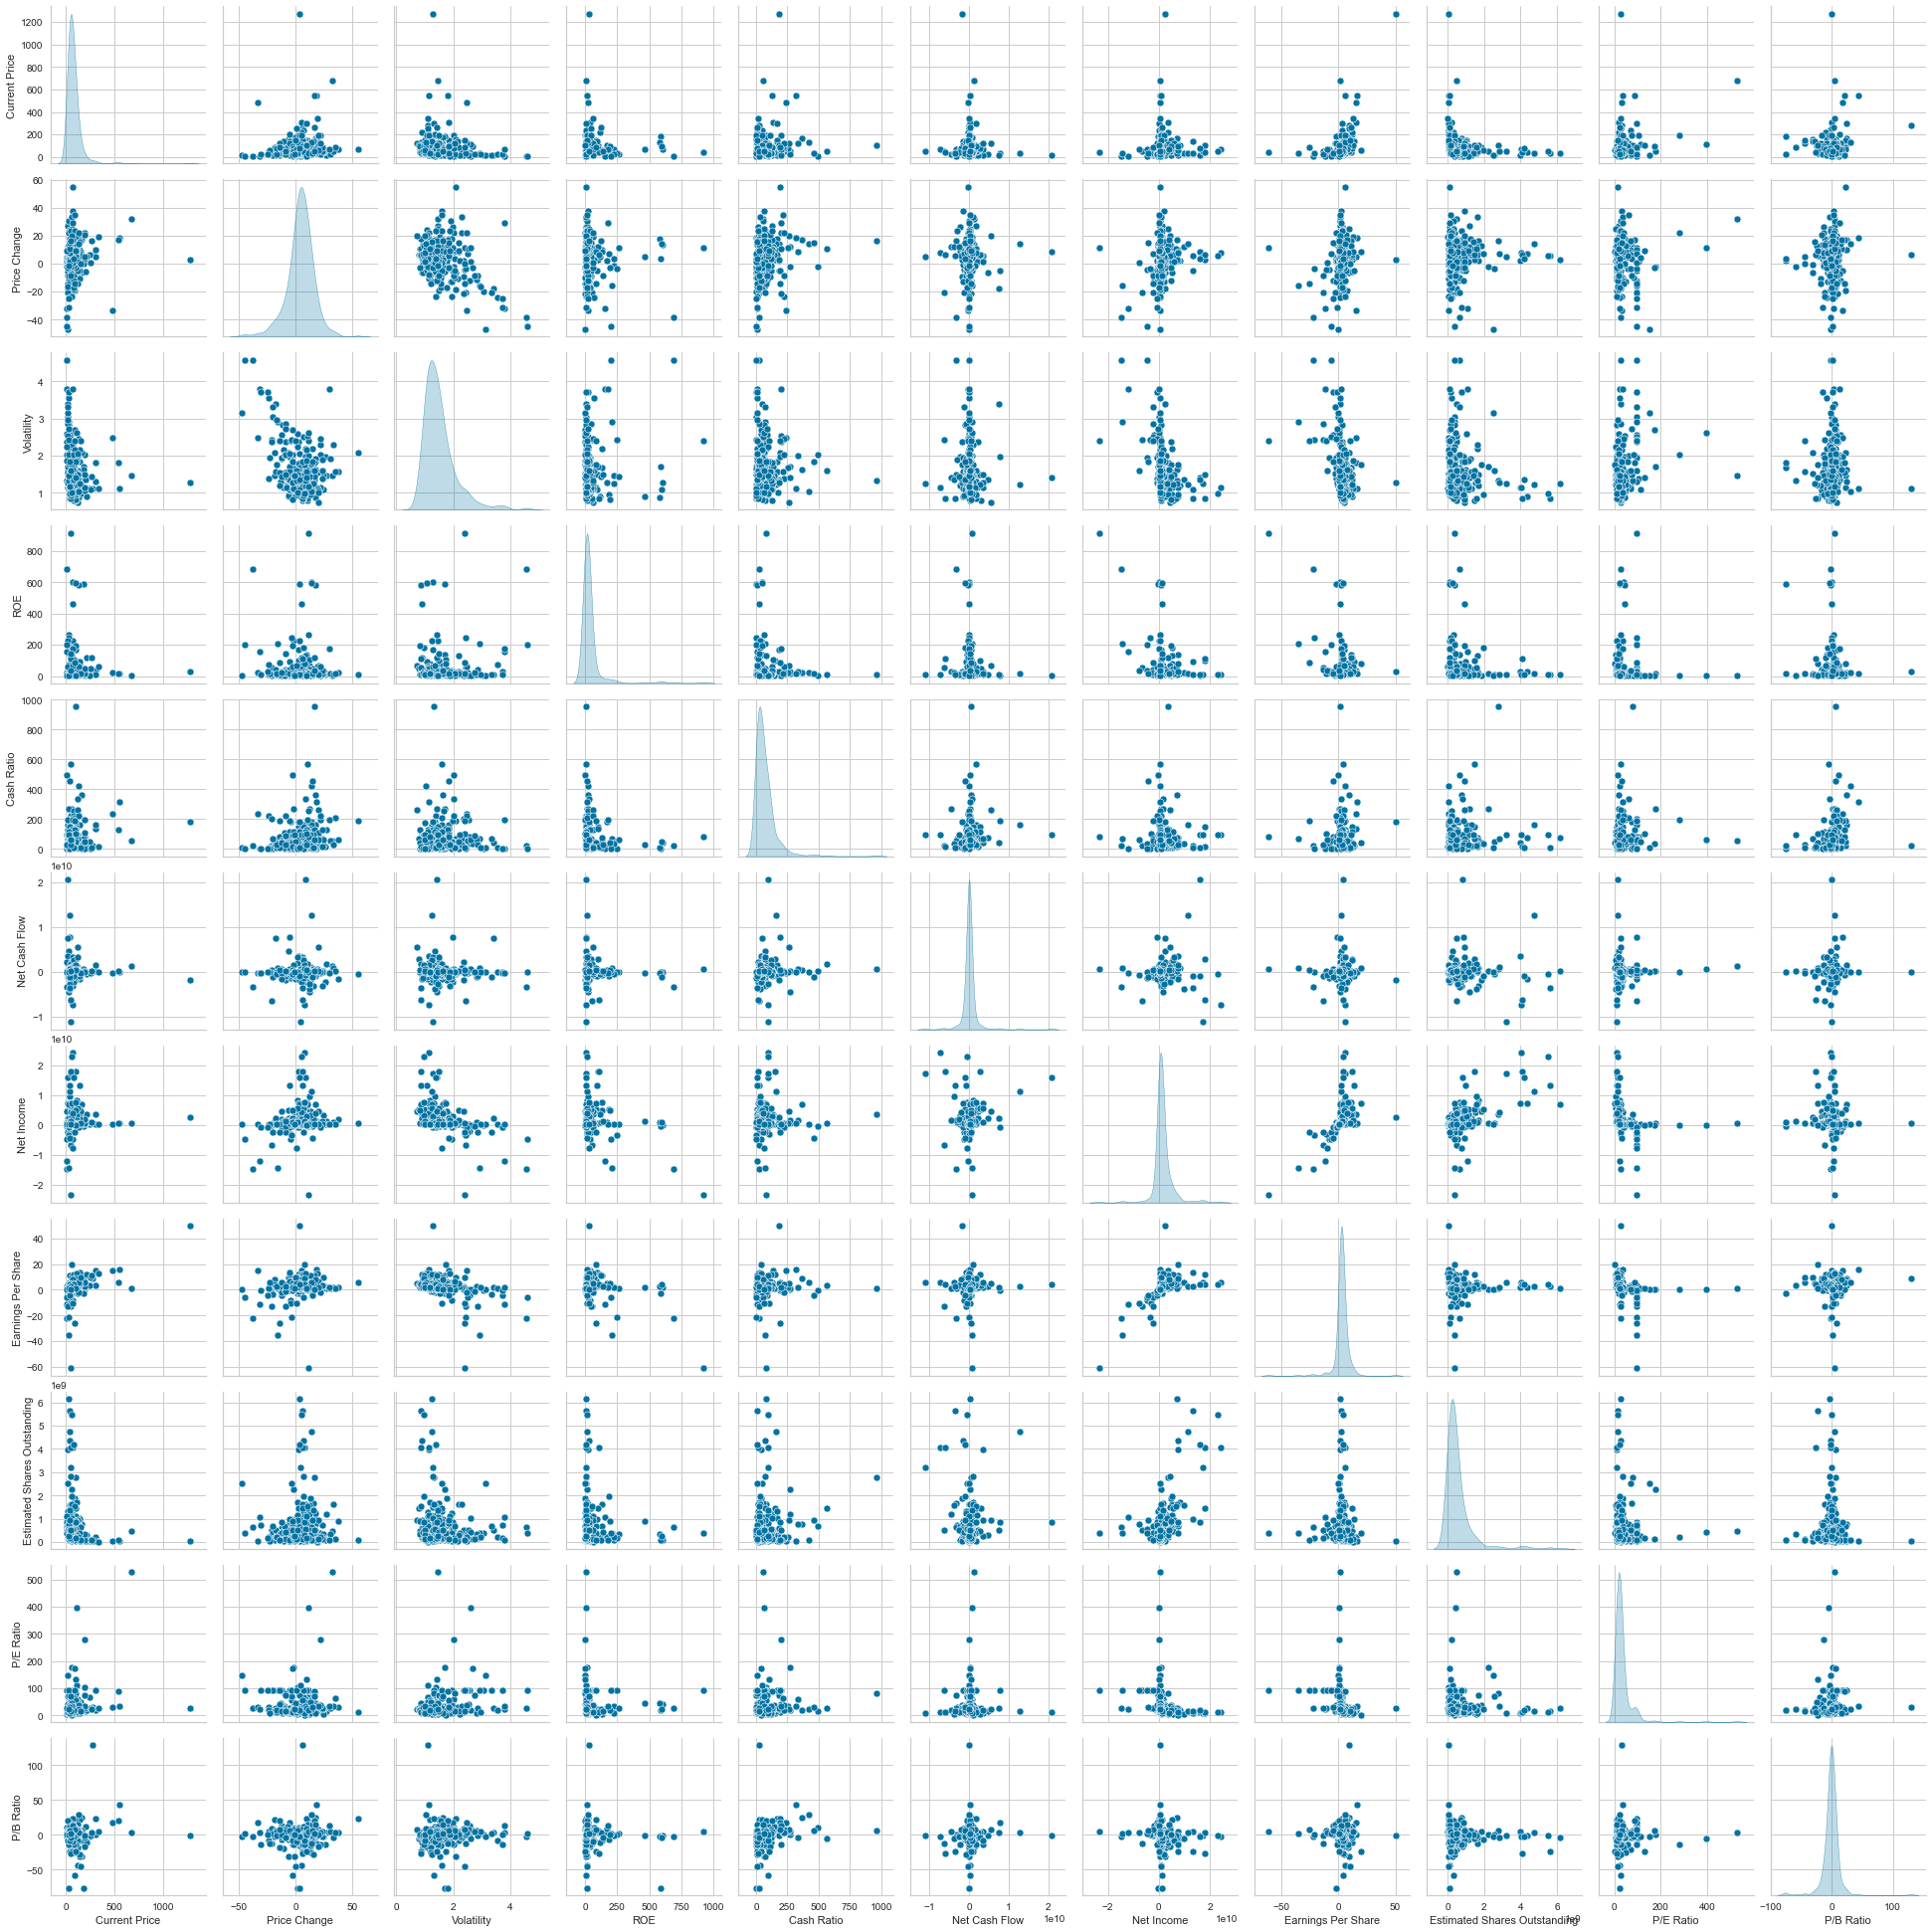

In [30]:
# Plotting a pairplot of all numerical variables
sns.pairplot(data=df_new, diag_kind="kde")
plt.show()

#### Observations:
Q3. How are the different variables correlated with each other?
- There is not much correlation between variables except for a few variables that have a slight positive correlation.
- Net income is slightly positively correlated with estimated shares outstanding (0.59) and earnings per share (0.56).

### GICS Sector vs Price Change

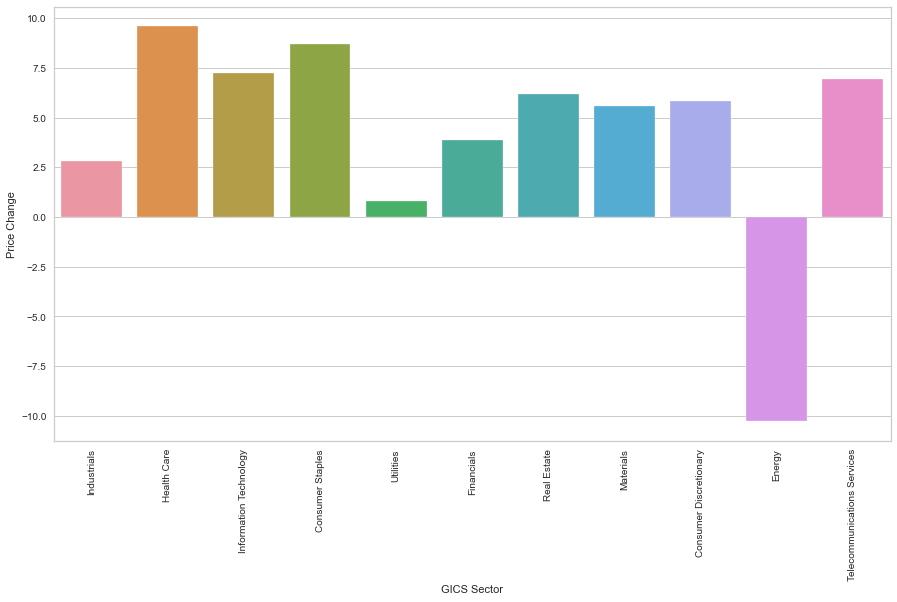

In [31]:
# Plotting a barplot of GICS Sector vs Price Change
plt.figure(figsize=(15,8))
sns.barplot(data=df_new, x=df_new['GICS Sector'], y=df_new['Price Change'], ci=False)
plt.xticks(rotation=90)
plt.show()

#### Observations:
Q2. The stocks of which economic sector have seen the maximum price increase on average?
- The health care sector has seen the maximum price increase on average of about 9.5

### GICS Sector vs Cash Ratio

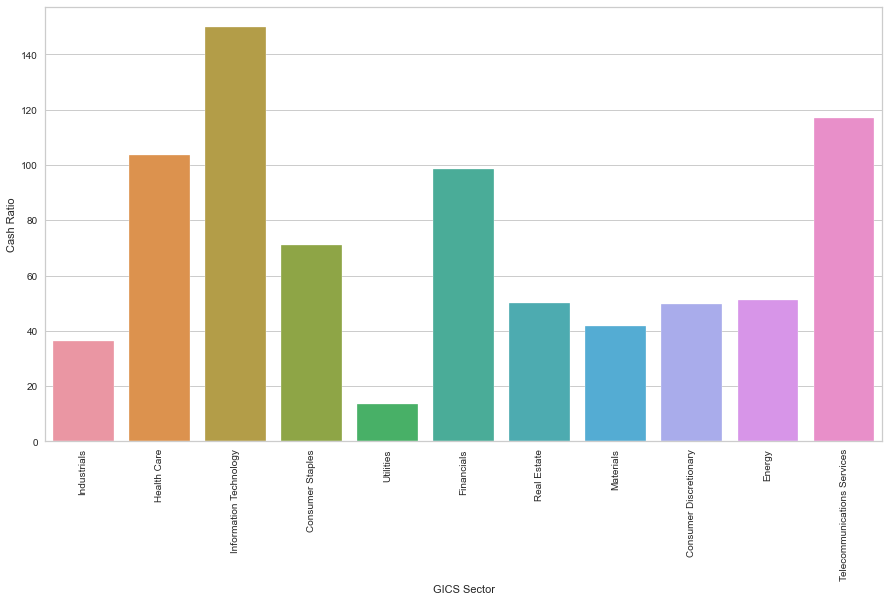

In [32]:
# Plotting a barplot of GICS Sector vs Cash Ratio
plt.figure(figsize=(15,8))
sns.barplot(data=df_new, x=df_new['GICS Sector'], y=df_new['Cash Ratio'], ci=False)
plt.xticks(rotation=90)
plt.show()

#### Observations:
Q4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
- The average cash ratio is the greatest in Information Techonology sector at about 150. This is followed by Telecommunications Services (115) and Health Care (105) sectors. 
- Utilities sector has the smallest average cash ratio of about 10. 

### GICS Sector vs P/E Ratio

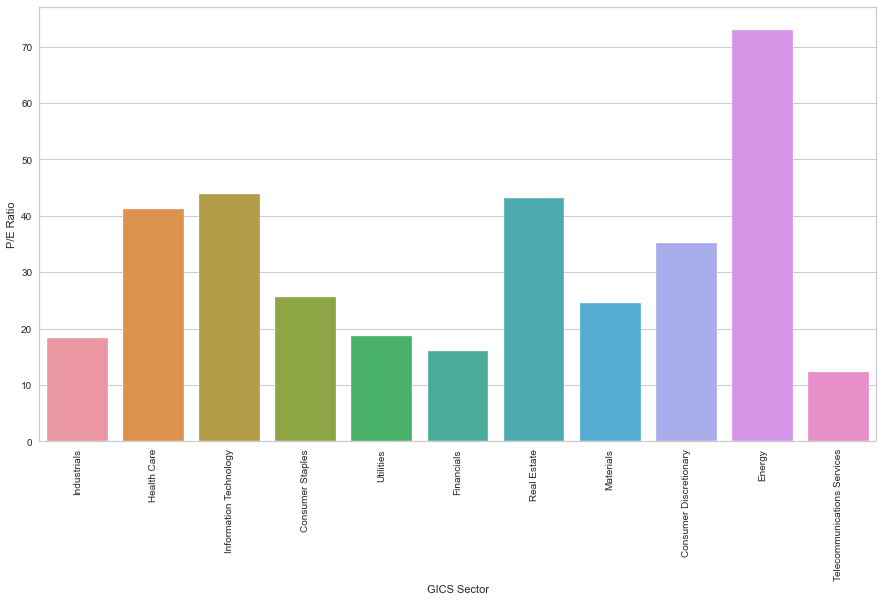

In [33]:
# Plotting a barplot of GICS Sector vs P/E Ratio
plt.figure(figsize=(15,8))
sns.barplot(data=df_new, x=df_new['GICS Sector'], y=df_new['P/E Ratio'], ci=False)
plt.xticks(rotation=90)
plt.show()

#### Observations:
Q5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?
- The P/E ratio is significantly greatest in Energy sector (around 73) which is followed by the Information Technology and Real Estate sectors (around 43).
- Telecommunication Services has the lowest P/E ratio of about 12. 

#### GICS Sector vs Volatility

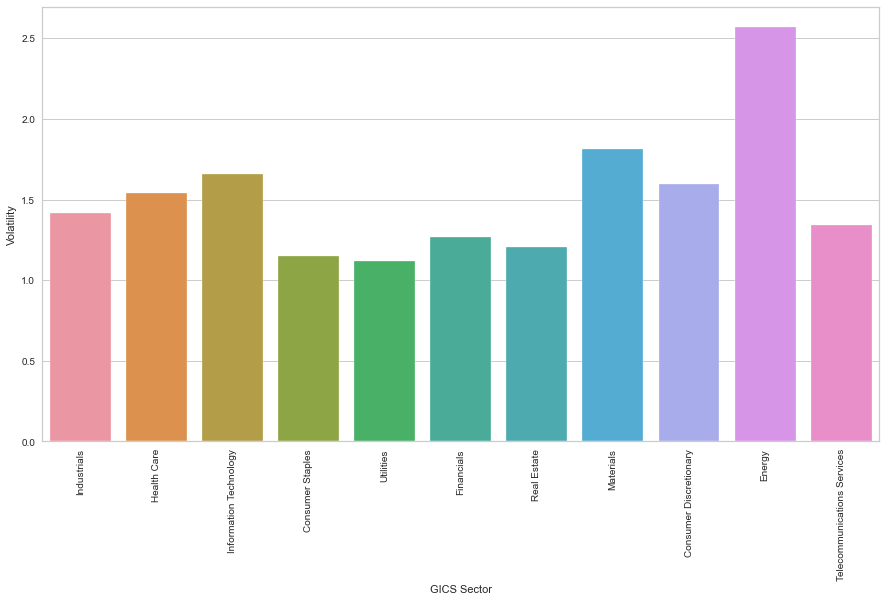

In [34]:
# Plotting a barplot of GICS Sector vs Volatility
plt.figure(figsize=(15,8))
sns.barplot(data=df_new, x=df_new['GICS Sector'], y=df_new['Volatility'], ci=False)
plt.xticks(rotation=90)
plt.show()

#### Observations:
- Energy sector's stock prices are the most volatile (around 2.6)
- All other sectors' volatility ranges from 1 to about 1.7

### EDA Insights:

**Data Description:**

* The dataset has 340 rows and 15 columns of data.
* There are no null values in the original dataset.
* Only the Ticker Symbol, Security, GICS Sector and GICS Sub Industry columns are of object data type. All other columns are of either float64 or int64 data type. 
* The column security is incorrectly named and is renamed to Company. 


**Observations from EDA:**

* `Ticker Symbol`: This is just an identifier for each company. There are 340 unique Ticker Symbols.
* `Company`: This is just the name of each company. There are 340 unique companies.
* `GICS Sector`: There are 11 unique sectors. Industrials (15.6%) is the most common economic sector, followed by Financials (14.4%) and Health Care and Consumer Discretionary (both 11.8%). Telecommunications Services (1.5%) is the least common economic sector.
* `GICS Sub Industry`: There are 104 unique sub industries. Oil and Gas Exploration and Transportation (4.7%) is the most common sub industry. This is followed by Industrial Conglormerates and REITS (4.1%). 
* `Current Price`: The current stock price ranges from 4.50 dollars to about 1274.95 dollars with a mean of around 80.86 dollars. The distribution of stock price is skewed to the right with some outliers.
* `Price Change`: The percentage change in the stock price in 13 weeks ranges from about -47.13% to about 55.05% with a mean of around 4.08%. The distribution of price change is close to a normal distribution. The health care sector has seen the maximum price increase on average of about 9.5
* `Volatility`: The standard deviation of the stock price over the past 13 weeks ranges from about 0.73 to about 4.58 with a mean of about 1.53. The distribution is right skewed. Energy sector's stock prices are the most volatile (around 2.6). All other sectors' volatility ranges from 1 to about 1.7
* `ROE`: ROE ranges from 1 to 917 with a mean of about 39.60. The distribution is heavily right skewed with some outliers. 
* `Cash Ratio`: The cash ratio ranges from 0 to 958 with a mean of about 70.02. The distribution is right skewed with some outliers. The average cash ratio is the greatest in Information Techonology sector at about 150. This is followed by Telecommunications Services (115) and Health Care (105) sectors. Utilities sector has the smallest average cash ratio of about 10. 
* `Net Cash Flow`: The net cash flow ranges widely from -11208000000 dollars to 20764000000 dollars with a mean of about 55537620.59 dollars. The distribution is close to a normal distribution with some outliers.
* `Net Income`: The net income also ranges widely from -23528000000 dollars to 24442000000 dollars with a mean of about 1494384602.94 dollars. The distribution is close to a normal distribution. Net income is slightly positively correlated with estimated shares outstanding (0.59) and earnings per share (0.56).
* `Earnings Per Share`: The earnings per share ranges from about -61.20 dollars to about 50.09 dollars with a mean of about 2.78 dollars. The distribution is close to a normal distribution with some outliers.
* `Estimated Shares Outstanding`: The estimated shares outstanding ranges from about 27672156.86 to 6159292035 with a mean of about 577028337.75. The distribution is skewed to the right.
* `P/E Ratio`: The P/E Ratio ranges from about 2.94 to about 528.04 with a mean of about 32.61. - The distribution is right skewed with some outliers. The P/E ratio is significantly greatest in Energy sector (around 73) which is followed by the Information Technology and Real Estate sectors (around 43). Telecommunication Services has the lowest P/E ratio of about 12. 
* `P/B Ratio`: The P/B Ratio ranges from about -76.12 to about 129.06 with a mean of about 1.72. The distribution is close to a normal distribution with some outliers.

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

### 1. Duplicate value check

In [35]:
# Checking for any duplicate values
df_new.duplicated().sum()

0

#### Observations:
- There are no duplicates in the data.

### 2. Missing value check

In [36]:
# Checking missing values for each column.
df_new.isna().sum()

Ticker Symbol                   0
Company                         0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

#### Observations:
- There are no missing values in the data.

### 3. Outlier Check

- Let's plot the boxplots of all numerical columns to check for outliers.

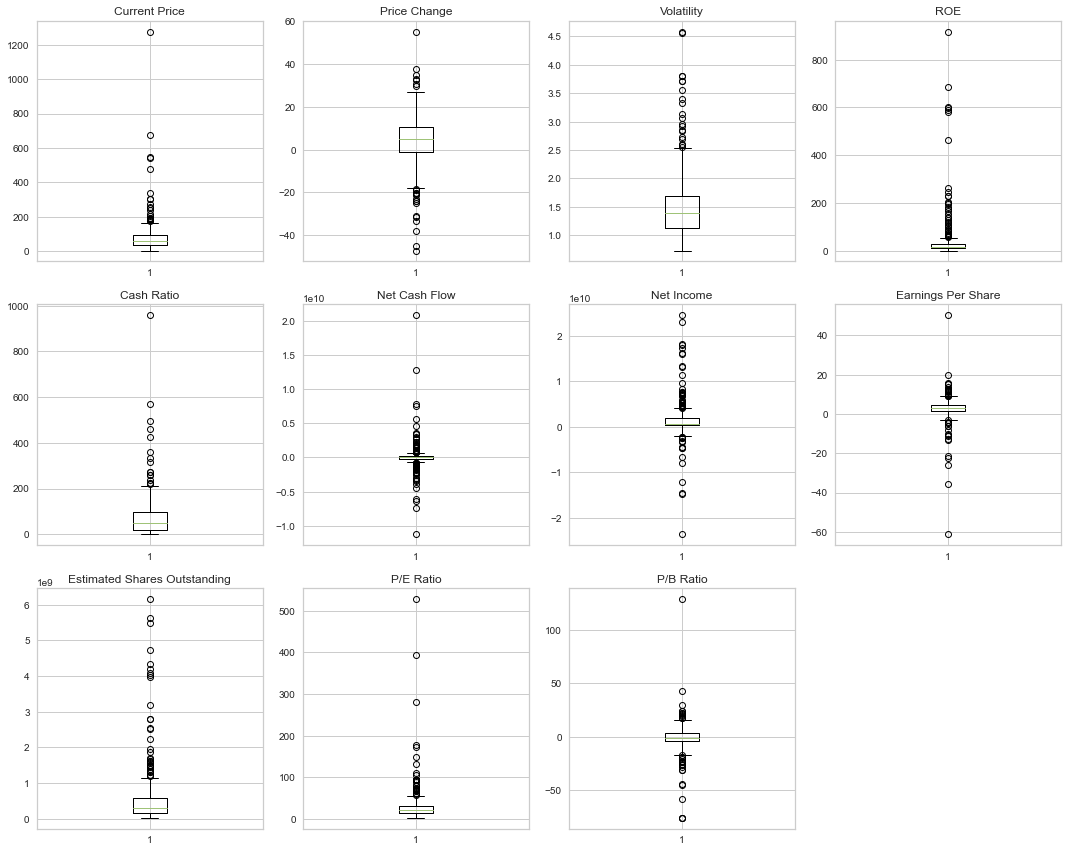

In [37]:
# outlier detection using boxplot
numeric_columns = df_new.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df_new[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Observations:
- We do notice that there are some outliers.
- However, we would not treat them as they are proper values.

### 4. Scaling

In [214]:
# Creating a copy of the data first
df1 = df_new.copy()

# Scaling the data set before clustering
scaler = StandardScaler()
num_col = df1.select_dtypes(include=np.number).columns.tolist()
subset = df1[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

In [215]:
# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## EDA

- It is a good idea to explore the data once again after manipulating it.

### Heatmap

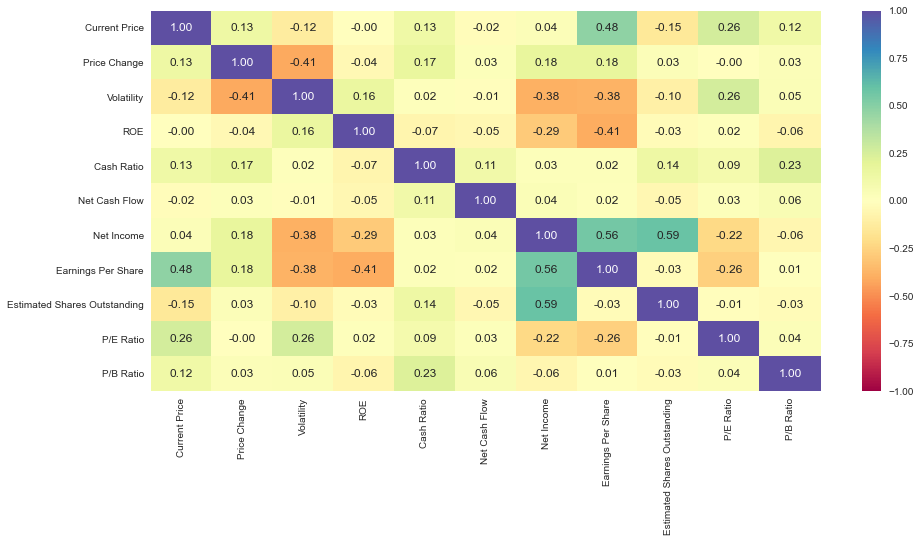

In [216]:
# plotting a heatmap of all numerical variables
plt.figure(figsize=(15, 7))
sns.heatmap(df1.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Pairplot

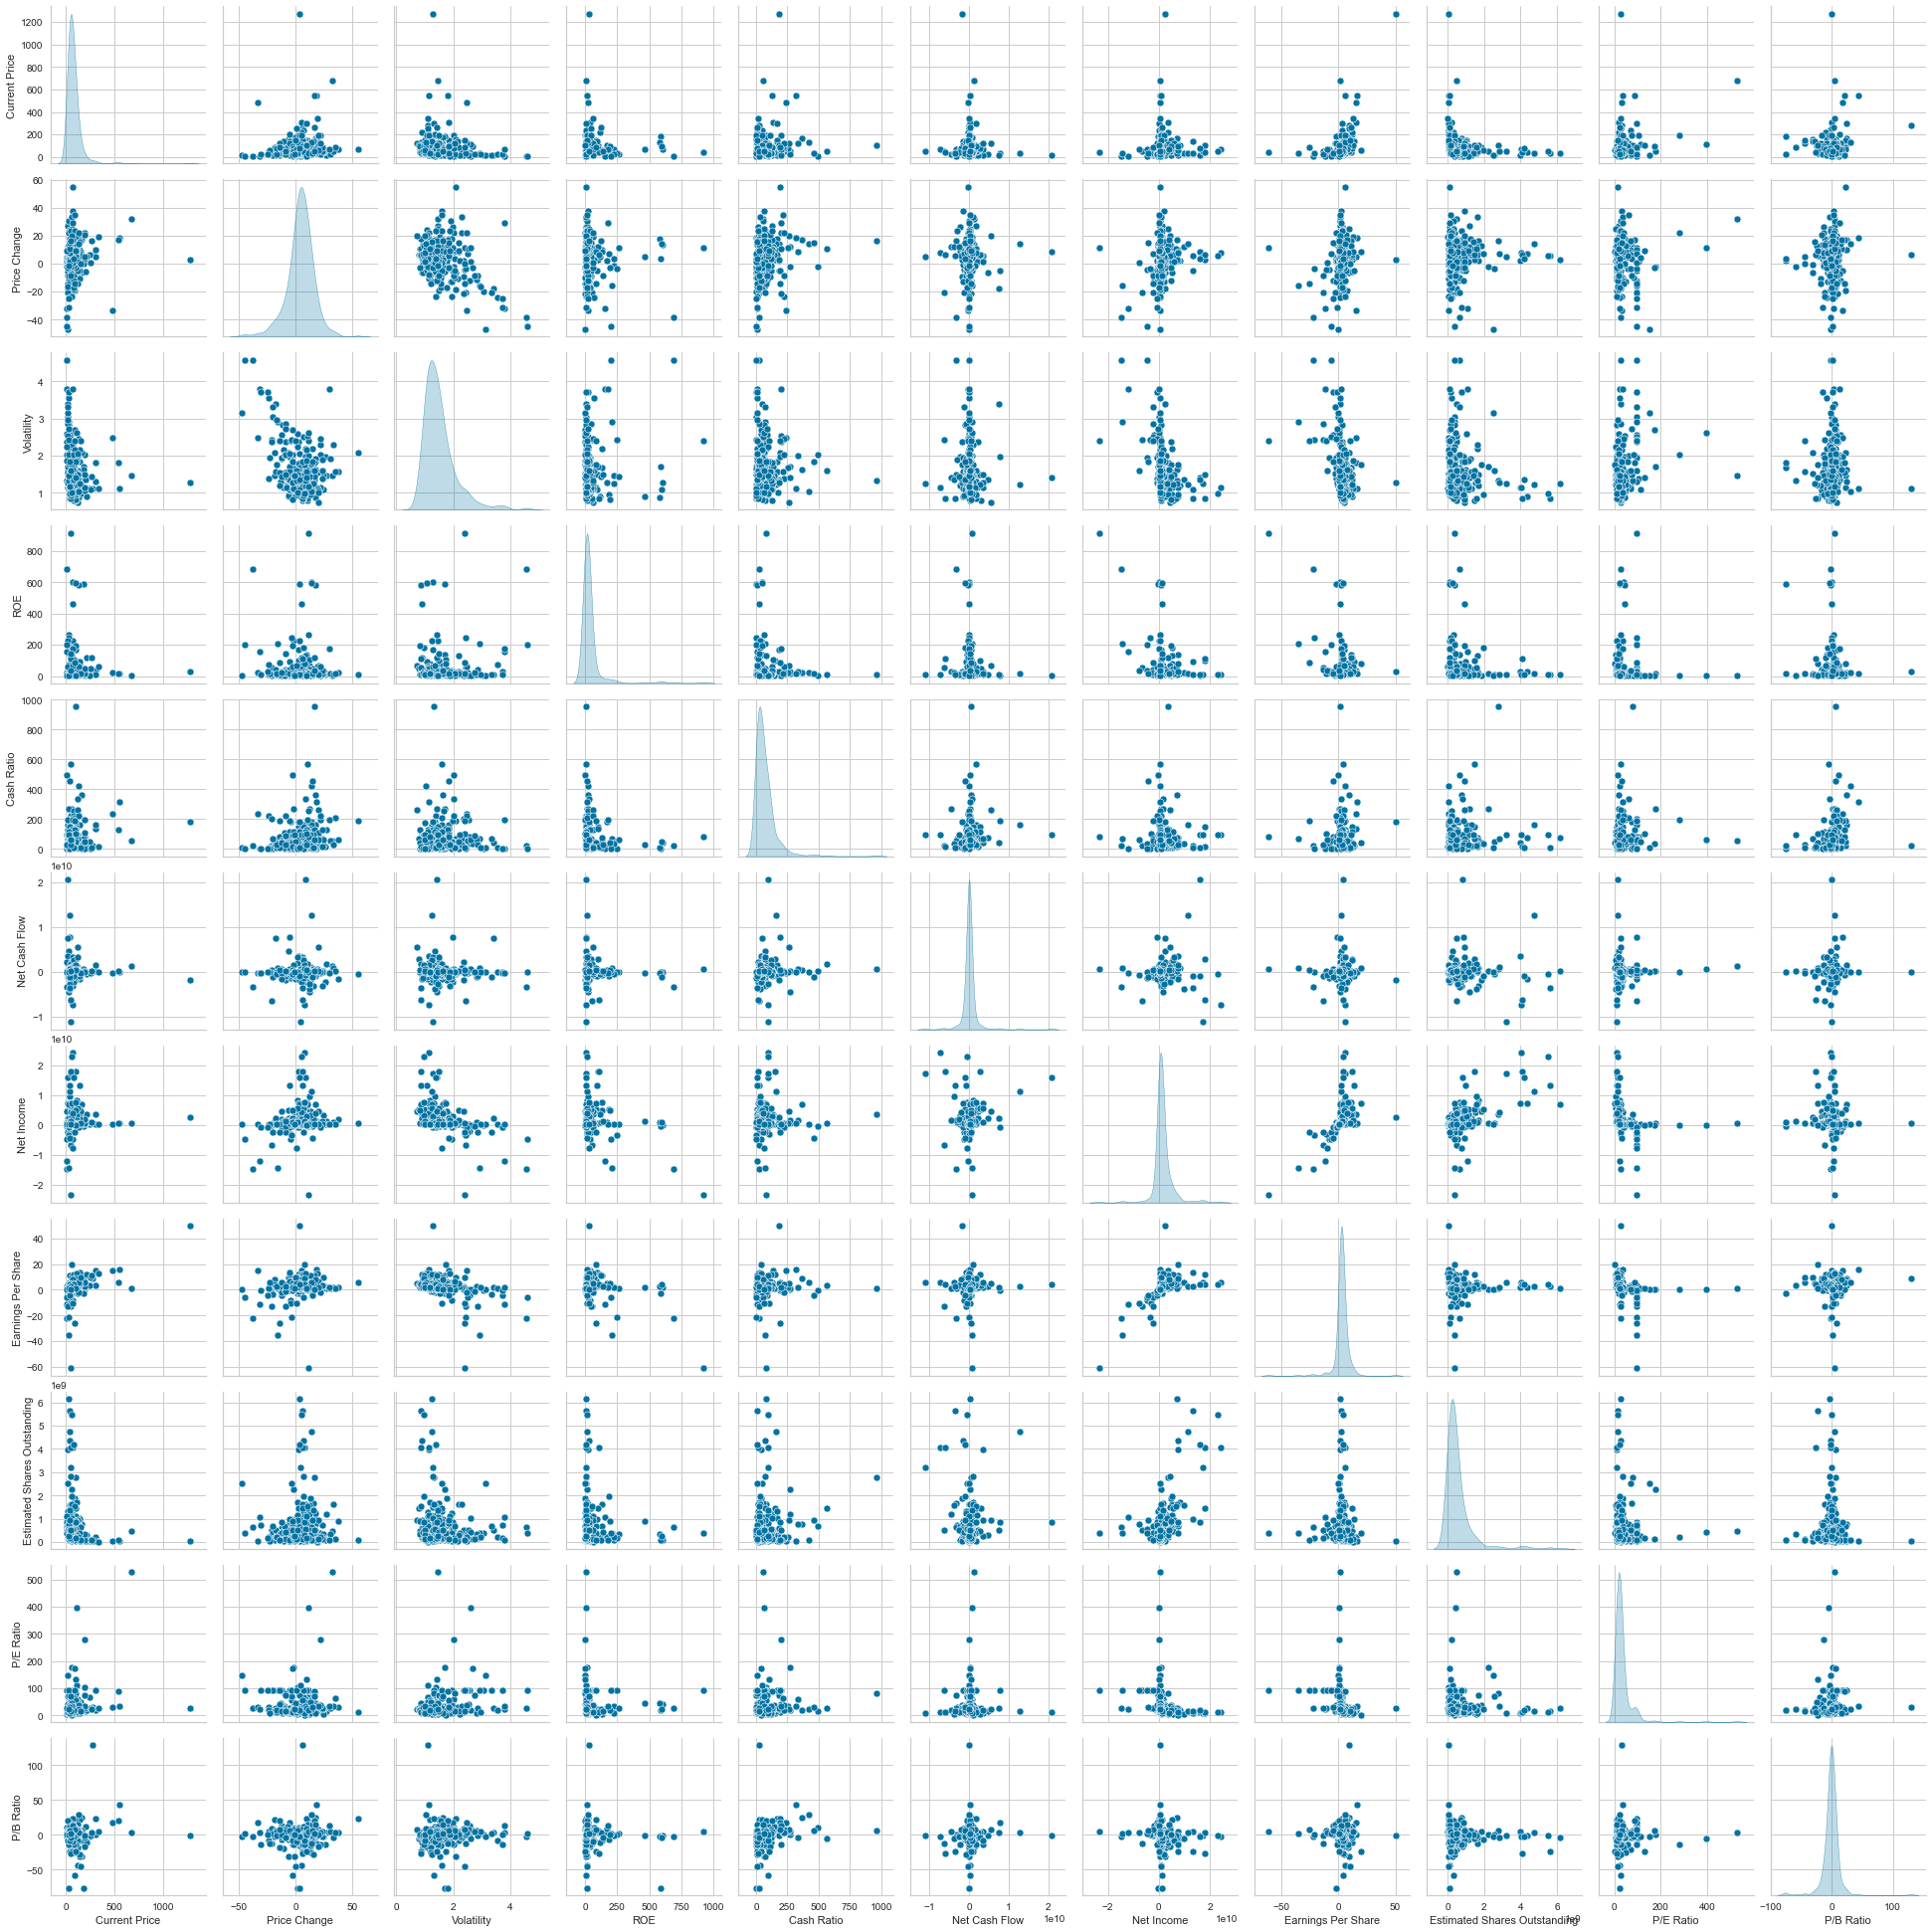

In [217]:
# Plotting a pairplot of all numerical variables
sns.pairplot(data=df1, diag_kind="kde")
plt.show()

#### Observations:
- There are no changes in the correlation between variables.

## K-means Clustering

In [218]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.128799332840716
Number of Clusters: 6 	Average Distortion: 2.080400099226289
Number of Clusters: 7 	Average Distortion: 2.0289794220177395
Number of Clusters: 8 	Average Distortion: 1.964144163389972


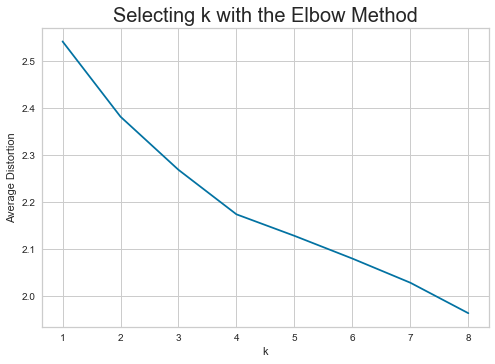

In [240]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

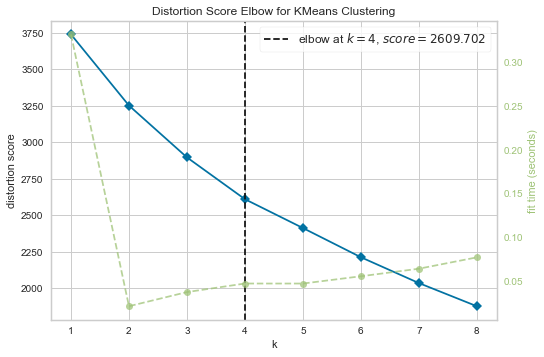

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [241]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 9), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

#### Observations:
- Appropriate value for k seems to be 4. 

**Let's check the silhouette scores.**

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779404)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.4005422737213617)
For n_clusters = 7, the silhouette score is 0.3976335364987305)
For n_clusters = 8, the silhouette score is 0.40278401969450467)


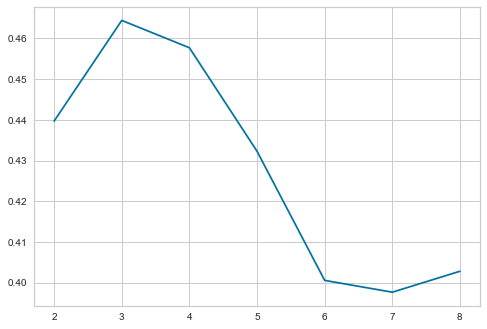

In [242]:
sil_score = []
cluster_list = range(2, 9)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

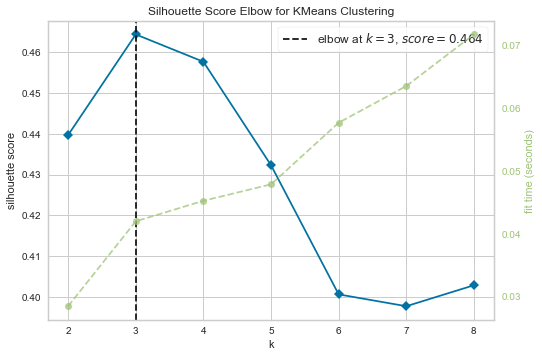

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [243]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 9), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

**From the silhouette scores, it seems that 3 is a good value of k.**

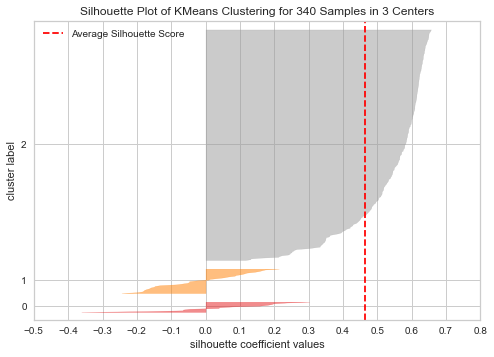

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [244]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

**Let's try k=4 as there is a knick at 4 in the elbow curve.**

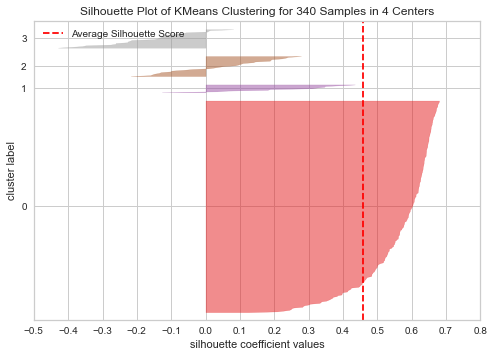

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [245]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

**Let's take 4 as the appropriate no. of clusters as there is a knick at 4 in the elbow curve and the silhouette score is only slightly lower than k=3.**

### Final K-means model

In [246]:
# final K-means model
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(k_means_df)

KMeans(n_clusters=4, random_state=1)

In [247]:
# creating a copy of the original data
df2 = df1.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df2["KM_segments"] = kmeans.labels_

### Cluster Profiles

In [248]:
# Gouping by cluster labels and displaying cluster profiles
km_cluster_profile = df2.groupby("KM_segments").mean()
km_cluster_profile["count_in_each_segment"] = (df2.groupby("KM_segments")["Company"].count().values)
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
KM_segments,,,,,,,,,,,,
0,72.399112,5.066225,1.388319,34.620939,53.000000,-14046223.826715,1482212389.891697,3.621029,438533835.667184,23.843656,-3.358948,277
1,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
2,38.099260,-15.370329,2.910500,107.074074,50.037037,-159428481.481481,-3887457740.740741,-9.473704,480398572.845926,90.619220,1.342067,27
3,234.170932,13.400685,1.729989,25.600000,277.640000,1554926560.000000,1572611680.000000,6.045200,578316318.948800,74.960824,14.402452,25


#### Observations:
- Cluster 0 - Greatest number of companies
- Cluster 1 - High net income and estimated shares outstanding
- Cluster 2 - High volatility, ROE and P/E Ratio
- Cluster 3 - High current price, price change, cash ratio, net cash flow, earnings per share and P/B ratio 

**Companies in each cluster**

In [249]:
# Printing companies in each cluster
for cl in df2["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["KM_segments"] == cl]["Company"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castl

#### Observations:
- Cluster 0 has the most number of companies (277) and Cluster 1 has the least number of companies (11).

**GICS Sectors in each cluster**

In [250]:
# Printing the GICS Sectors in each cluster 
df2.groupby(["KM_segments", "GICS Sector"])["Company"].count()

KM_segments  GICS Sector                
0            Consumer Discretionary         33
             Consumer Staples               17
             Energy                          6
             Financials                     45
             Health Care                    29
             Industrials                    52
             Information Technology         24
             Materials                      19
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
1            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     2
             Information Technology          1
             Telecommunications Services     2
2            Energy                         22
             Industrials                     1
             Inform

#### Observations:
- Energy and Information Technology sectors are present in all clusters.
- Utilities sector is only present in cluster 0.
- Few sectors ike Consumer Discretionary, Consumer Staples, Financials, Health Care and Telecommunication Services are present in clusters 0, 1 and 3.
- Industrials and Materials sectors are only present in clusters 0 and 2. 
- Cluster 0 has a lot of companies in all sectors as it has the largest number of companies in it.
- Majority of the companies in cluster 2 belong to Energy sector. 

**Boxplot of numerical variables for each cluster**

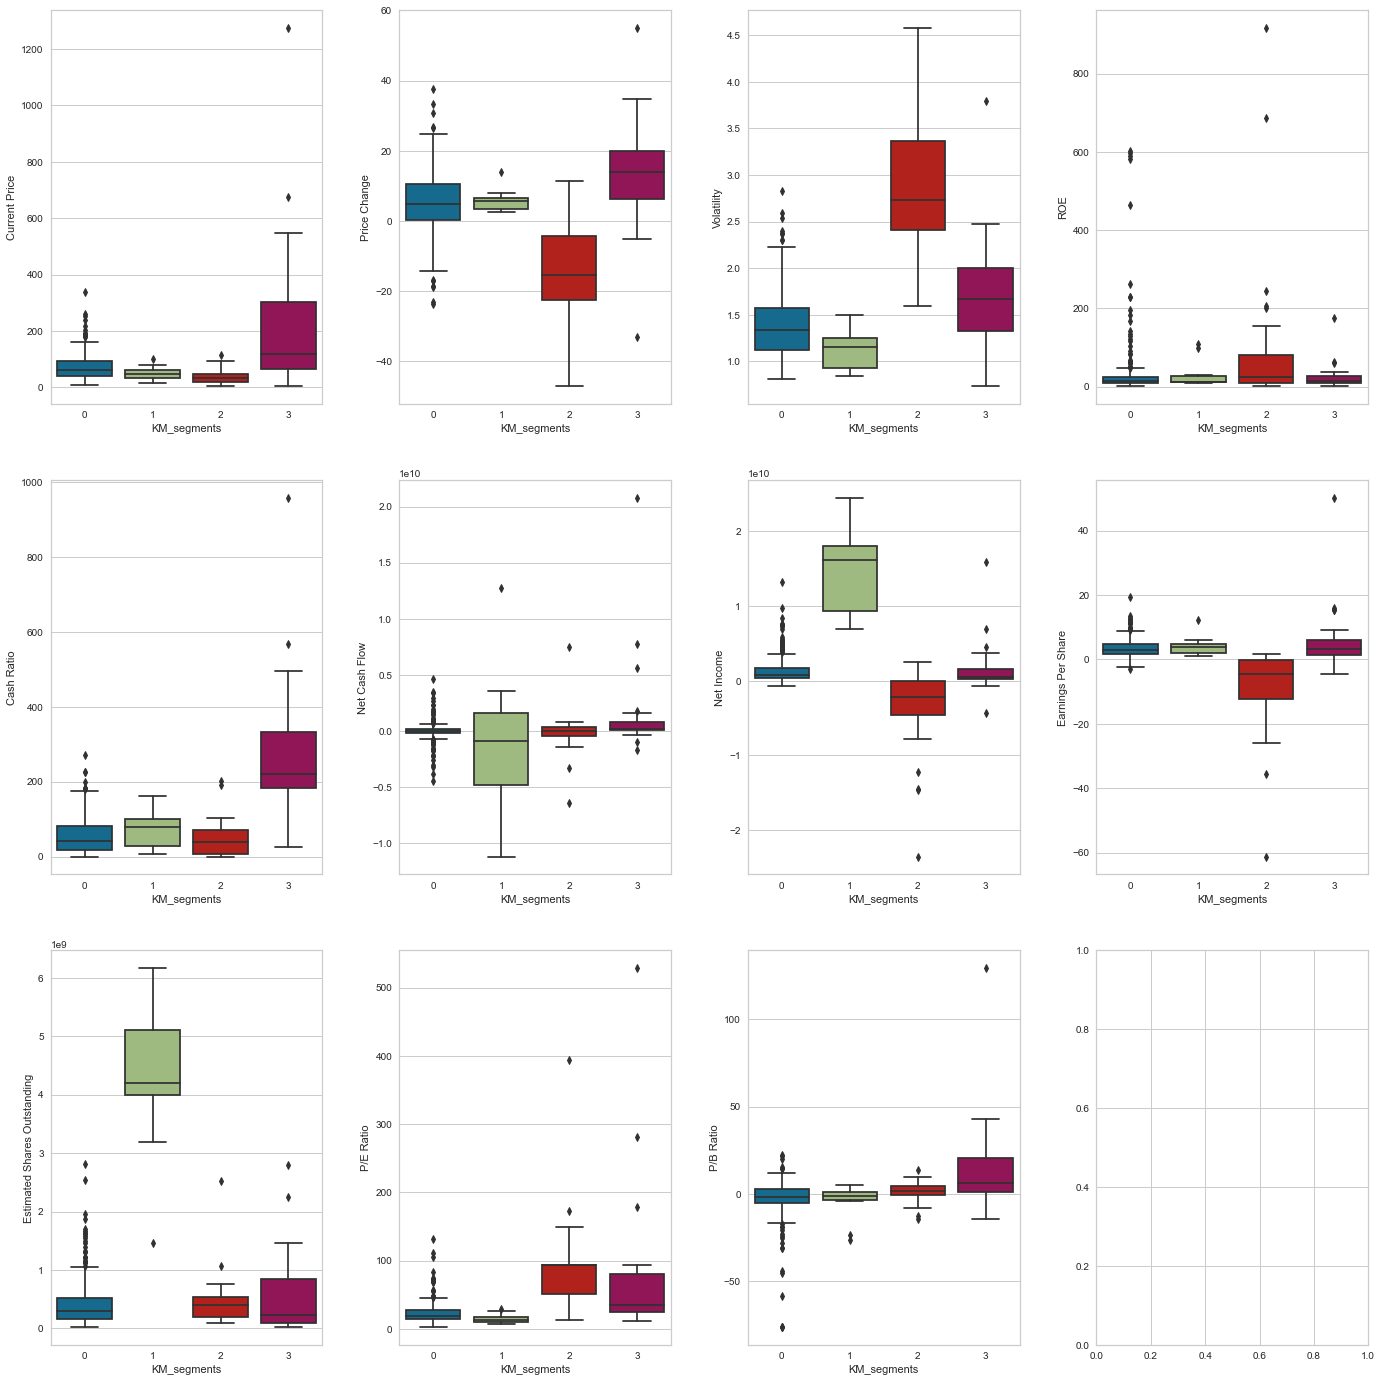

In [251]:
# Plotting the boxplot of numerical variables for each cluster
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii][jj],
                data=df2,
                y=df2.columns[4+counter],
                x="KM_segments",
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)

#### Observations and Insights:
- **Cluster 0 - 277 companies** 
    - Very low ROE and net cash flow. 
    - Low current price, cash ratio, estimated shares outstanding, P/E Ratio, net income, earnings per share and P/B ratio.
    - Moderate price change.
    - Very low to moderate volatility.
    
- **Cluster 1 - 11 companies** 
    - Very low current price, ROE, P/E ratio, earnings per share and P/B ratio.
    - Low price change, volatility and cash ratio.
    - Very low net cash flow.
    - Moderate to very high net income and estimated shares outstanding. 
    
- **Cluster 2 - 27 companies**
    - Very low current price, net cash flow and P/B ratio
    - Low to high negative price change.
    - Low to very high volatility.
    - Low ROE, P/E ratio, cash ratio and estimated shares outstanding.
    - Low to negative net income and earnings per share.
   
- **Cluster 3 - 25 companies**
    - Very low to moderate current price, volatility and cash ratio.
    - Low to moderate price change and P/B ratio. 
    - Very low ROE, net cash flow and net income.
    - Low estimated shares outstanding, P/E ratio, and earnings per share.

## Hierarchical Clustering

In [257]:
hc_df = subset_scaled_df.copy()

In [258]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524589.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850003.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159737.
Cophenetic correl

In [259]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


**Let's explore different linkage methods with Euclidean distance only.**

In [260]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


In [261]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


**We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.**

**Let's see the dendrograms for the different linkage methods.**

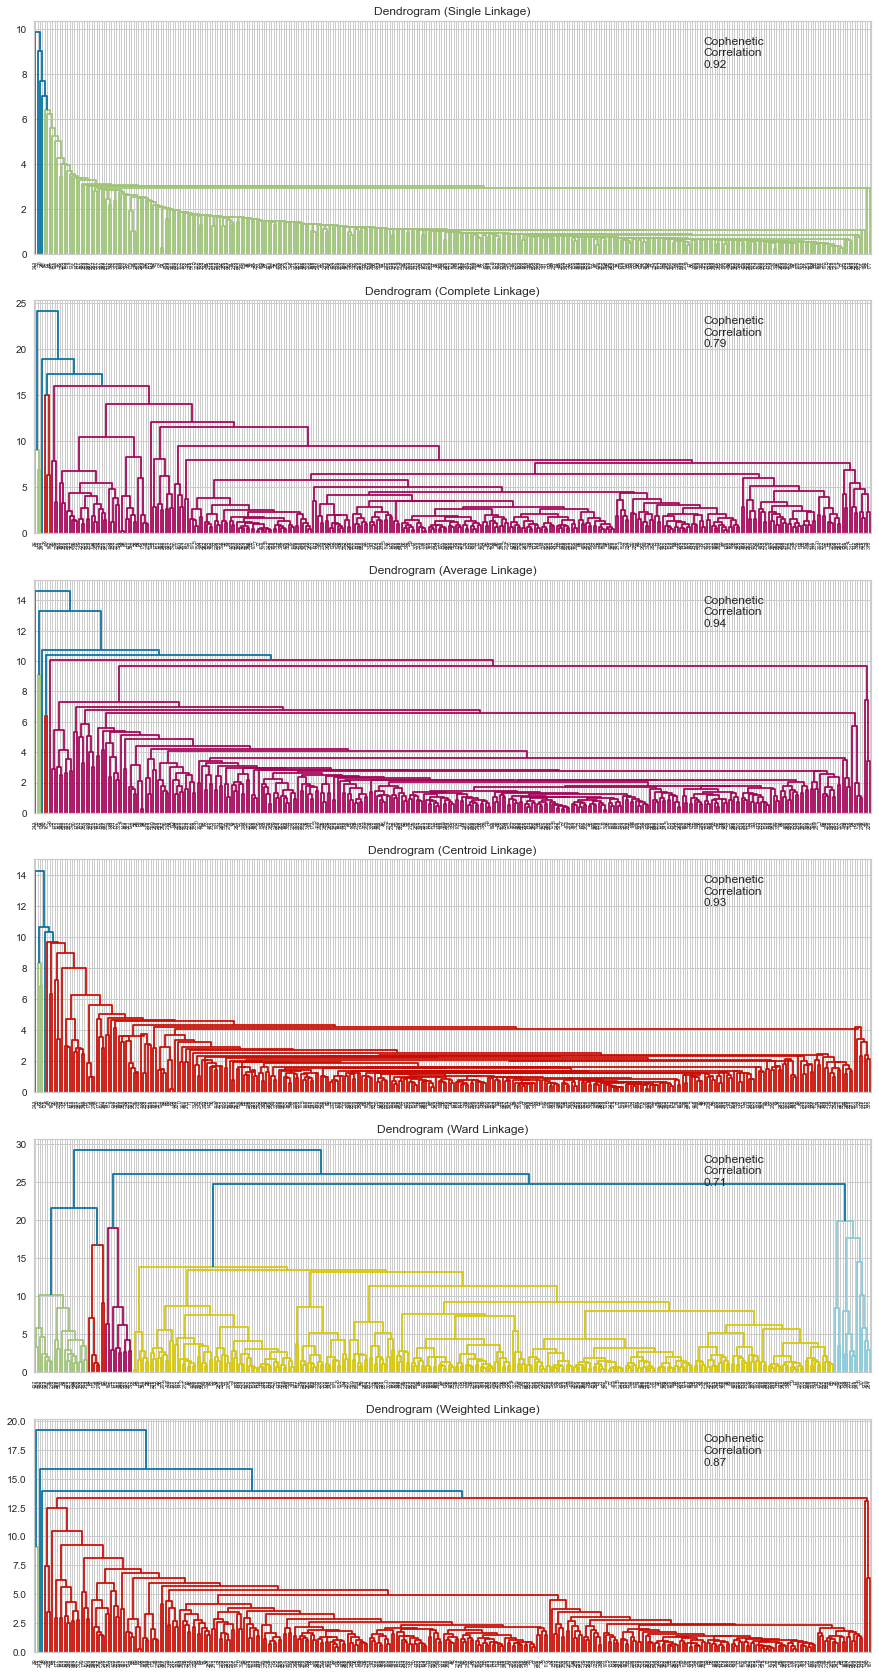

In [262]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Observations**

- The cophenetic correlation is highest for average linkage method (0.94).
- Hence, we will move ahead with average linkage.
- 4 appears to be the appropriate number of clusters from the dendrogram for average linkage.

### Final Hierarchical Clustering Model

In [269]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="average")
HCmodel.fit(hc_df)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [270]:
# creating a copy of the original data
df3 = df1.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df3["HC_segments"] = HCmodel.labels_

### Cluster Profiling

In [271]:
## Grouping by the cluster labels and displaying the cluster profiles
hc_cluster_profile = df3.groupby("HC_segments").mean()
hc_cluster_profile["count_in_each_segment"] = (df3.groupby("HC_segments")["Company"].count().values)
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,77.573266,4.148438,1.515708,35.184524,67.154762,67104693.452381,1607391086.309524,2.905640,572317821.413095,32.325679,-1.762402,336
1,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,1
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2
3,104.660004,16.224320,1.320606,8.000000,958.000000,592000000.000000,3669000000.000000,1.310000,2800763359.000000,79.893133,5.884467,1


#### Observations:
- Cluster 0 - Greatest number of companies
- Cluster 1 - High current price and earnings per share
- Cluster 2 - High volatility and ROE
- Cluster 3 - High price change, cash ratio, net cash flow, net income, estimated shares outstanding, P/E ratio and P/B ratio

**Companies in each cluster**

In [272]:
## Printing companies in each cluster
for cl in df3["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df3[df3["HC_segments"] == cl]["Company"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Alliance Data Systems' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Allegion' 'Alexion Pharmaceuticals'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Bank of America Corp' 'Baxter International Inc.' 'BB&T Corporation'
 'Bard (C.R.) Inc.' 'Baker Hughes Inc' 'BIOGEN IDEC I

#### Observations:
- Cluster 0 has the highest number of companies (336) and clusters 1 and 3 have the lowest number of companies (1 each).

**GICS Sectors in each cluster**

In [273]:
# Printing the GICS Sectors in each cluster 
df3.groupby(["HC_segments", "GICS Sector"])['Company'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary         39
             Consumer Staples               19
             Energy                         28
             Financials                     49
             Health Care                    40
             Industrials                    53
             Information Technology         32
             Materials                      20
             Real Estate                    27
             Telecommunications Services     5
             Utilities                      24
1            Consumer Discretionary          1
2            Energy                          2
3            Information Technology          1
Name: Company, dtype: int64

#### Observations:
- Cluster 0 has a lot of companies in all sectors as it has the largest number of companies in it.
- Clusters 1, 2 and 3 only have companies with one GICS Sector as they only have 1 or 2 companies in them. 

**Boxplot of numerical variables for each cluster**

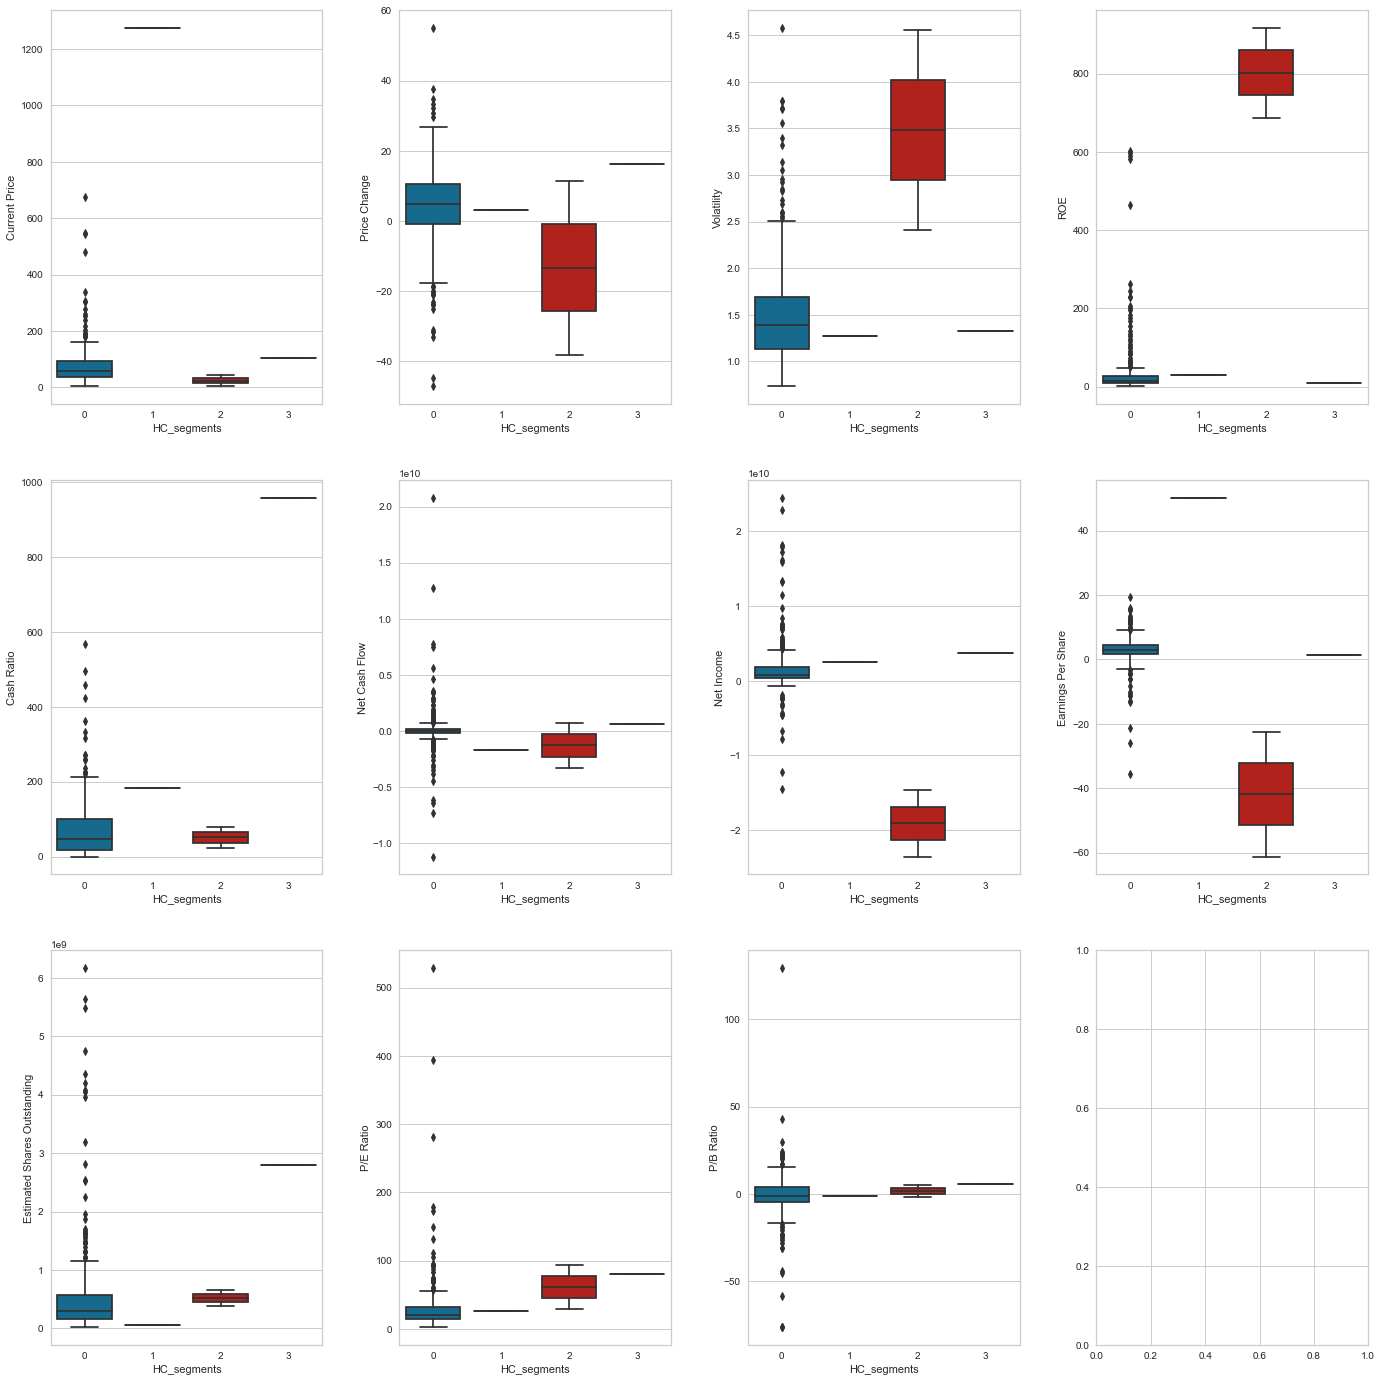

In [274]:
# Plotting the boxplot of numerical variables for each cluster
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii][jj],
                data=df3,
                y=df3.columns[4+counter],
                x="HC_segments",
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)

#### Observations & Insights:
- **Cluster 0 - 336 companies** 
    - Low current price, cash ratio and estimated shares outstanding.
    - Very low ROE, net cash flow, net income, earnings per share, P/B ratio and P/E ratio. 
    - Moderate price change.
    - Very low to moderate volatility. 
    
- **Cluster 1 - 1 company** 
    - Very high current price and earnings per share.
    - Low price change, net cash flow, net income and P/E ratio.
    - Low volatility and cash ratio.
    - Very low ROE, estimated shares outstanding and P/B ratio. 
    
- **Cluster 2 - 2 companies**
    - Very low current price and P/B ratio.
    - Low cash ratio, estimated shares outstanding, net cash flow and P/E ratio.
    - Low to high negative price change.
    - Moderate to very high volatility.
    - High ROE.
    - Very low negative net income and earnings per share. 
    
- **Cluster 3 - 1 company**
    - Low current price, price change, net income and earnings per share.
    - Very low ROE, cash flow and P/B ratio.
    - Moderate estimated shares outstanding.
    - Low volatility and P/E ratio.
    - Very high cash ratio.

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How do the silhouette scores vary?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

* Which clustering technique took less time for execution? - Both were about the same, and they were very quick. Only the dendograms for the different linkage methods in Hierarchical clustering took some time to get executed.
* Which clustering technique gave you more distinct clusters, or are they the same? - K-means has one huge cluster and 3 smaller clusters with few companies. Hierarchical clustering had one huge cluster and 3 very small clusters with only one or two companies. Hence, though both had one very huge cluster, K-means gave slightly more distinct clusters. In K-means clustering, Utilities sector was only present in cluster 0. Industrials and Materials sectors were only present in clusters 0 and 2. Majority of the companies in cluster 2 belonged to Energy sector. 
* How do the silhouette scores vary? - For K-means clustering, the silhouette score was the highest for k=3 at about 0.464. For the other k values, it roughly ranged from 0.398 to 0.458. 
* How many observations are there in the similar clusters of both algorithms? - In the largest cluster of both algorithms, K-means had 277 observations and Hierarchical clustering had 336 observations. 
* How many clusters are obtained as the appropriate number of clusters from both algorithms? - 4 clusters
* Similarities - Both K-means and Hierarchical clutering gave us 4 clusters. Both had one cluster with companies mainly from the Energy sector. Both clustering techniques gave one huge cluster that had companies from all sectors. 

## Actionable Insights and Recommendations
- We will go ahead with the K-means clustering as our final algorithm since it gives slightly more distinct clusters than Hierarchical clustering. 

- These are the insights and characteristics of the 4 clusters:

- **Cluster 0 - 277 companies** 
    - Very low ROE and net cash flow. 
    - Low current price, cash ratio, estimated shares outstanding, P/E Ratio, net income, earnings per share and P/B ratio.
    - Moderate price change.
    - Very low to moderate volatility.
    
- **Cluster 1 - 11 companies** 
    - Very low current price, ROE, P/E ratio, earnings per share and P/B ratio.
    - Low price change, volatility and cash ratio.
    - Very low net cash flow.
    - Moderate to very high net income and estimated shares outstanding. 
    
- **Cluster 2 - 27 companies**
    - Very low current price, net cash flow and P/B ratio
    - Low to high negative price change.
    - Low to very high volatility.
    - Low ROE, P/E ratio, cash ratio and estimated shares outstanding.
    - Low to negative net income and earnings per share.
   
- **Cluster 3 - 25 companies**
    - Very low to moderate current price, volatility and cash ratio.
    - Low to moderate price change and P/B ratio. 
    - Very low ROE, net cash flow and net income.
    - Low estimated shares outstanding, P/E ratio, and earnings per share.
    
Recommendations:

- Depending on the risk tolerance of the customer, Trade&Ahead company can suggest the appropriate clusters and companies to invest in. 
- Customers looking for profitability in their investments can invest in companies in cluster 1 as net income of cluster 1 is relatively higher than other clusters. 
- They can also invest in companies in cluster 3. Though cluster 3 has a slightly higher range in stock price,the earnings per share of cluster 3 is slightly higher than other clusters and hence it is slightly more profitable to invest in companies in cluster 3.
- Customers looking for higher ROE can invest in cluster 2. However, the ROE of cluster 2 is only slightly higher than other clusters. Also the volatility of cluster 2 is relatively higher and it has a low to high negative price change. Cluster 2 has majority of companies from Energy sector and we have seen previously in our EDA that Energy sector's stock prices are the most volatile (around 2.6). This explains the high volatility of cluster 2. Hence it is also more riskier to invest in companies in cluster 2 as compared to other clusters. It also has a slightly higher P/E ratio as compared to the other clusters, meaning its stock price is slightly overvalued. Also the earnings per share of cluster 2 ranges from low to negative and hence overall it is not very profitable to invest in companies in cluster 2.